#Task 1

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [2]:
class Kmeans:
    def __init__(self, n_clust, max_itr=30, tol=1e-2, dist='euclidean'):
        self.n_clust = n_clust
        self.max_itr = max_itr
        self.tol = tol
        self.distance_metric = dist
        self.centroids = None
        self.iter = 0

    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clust, replace=False)
        return X[indices]

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == 'cosine':
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        elif self.distance_metric == 'jaccard':
            intersection = np.sum(np.minimum(x1, x2))
            union = np.sum(np.maximum(x1, x2))
            return 1 - intersection / union
        else:
            raise ValueError("Invalid distance metric. Supported metrics: 'euclidean', 'cosine', 'jaccard'.")

    def assign_clusters(self, X):
        distances = np.array([[self.calculate_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.n_clust)])
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        previous_sse = None

        for self.iter in range(self.max_itr):
            old_centroids = self.centroids.copy()

            labels = self.assign_clusters(X)

            self.centroids = self.update_centroids(X, labels)

            current_sse = self.sse_calculate(X, labels)


            previous_sse = current_sse

            # Check for maximum iterations
            if self.iter == self.max_itr - 1:
                break

        return labels

    def sse_calculate(self, X, labels):
        sse = 0
        for i in range(self.n_clust):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            sse += np.sum(np.square(cluster_points - centroid))
        return sse

In [3]:
df_d = pd.read_csv("/content/data.csv", header=None)
df_l = pd.read_csv("/content/label.csv", header=None)

In [4]:
k = df_l[0].nunique()
print("No of CLusters: ", k)

No of CLusters:  10


In [5]:
data = df_d.values

In [6]:
def sse_kmeans(dataset, distance):
    kmeans = Kmeans(n_clust=k, dist=distance)
    labels = kmeans.fit(dataset)
    return kmeans.sse_calculate(dataset, labels), labels

In [7]:
euclidean_sse, euc_labels = sse_kmeans(data, 'euclidean')
cosine_sse, cos_labels = sse_kmeans(data, 'cosine')
jaccard_sse, jac_labels = sse_kmeans(data, 'jaccard')

In [8]:
print("Euclidean SSE:", euclidean_sse)
print("Cosine SSE:", cosine_sse)
print("Jaccard SSE:", jaccard_sse)

Euclidean SSE: 25369377531.591858
Cosine SSE: 25457687521.431095
Jaccard SSE: 25415429151.388924


In [71]:
def sse_kmeans(dataset, distance):
    kmeans = Kmeans(n_clust=k, dist=distance, max_itr=50)
    labels = kmeans.fit(dataset)
    return kmeans.sse_calculate(dataset, labels)

In [72]:
euclidean_sse = sse_kmeans(data, 'euclidean')
cosine_sse = sse_kmeans(data, 'cosine')
jaccard_sse = sse_kmeans(data, 'jaccard')

In [73]:
print("Euclidean SSE:", euclidean_sse)
print("Cosine SSE:", cosine_sse)
print("Jaccard SSE:", jaccard_sse)

Euclidean SSE: 25428422878.677235
Cosine SSE: 25680134338.728954
Jaccard SSE: 25591106704.390587


Q2: Compare the accuracies of Euclidean-K-means Cosine-K-means, Jarcard-K-means. First,
label each cluster using the majority vote label of the data points in that cluster. Later, compute
the predictive accuracy of Euclidean-K-means, Cosine-K-means, Jarcard-K-means.

In [9]:
def assign_labels(labels, truth_val):
    cluster_majority_labels = []
    for i in range(np.max(labels) + 1):
        cluster_indices = np.where(labels == i)[0]
        cluster_truth_val = truth_val.iloc[cluster_indices]
        mode_result = mode(cluster_truth_val)
        majority_label = mode_result.mode
        cluster_majority_labels.append(majority_label)
    return cluster_majority_labels

In [10]:
majority_labels_euc = assign_labels(euc_labels, df_l[0])
majority_labels_cos = assign_labels(cos_labels, df_l[0])
majority_labels_jac = assign_labels(jac_labels, df_l[0])

In [11]:
acc_euc = accuracy_score(df_l[0], [majority_labels_euc[i] for i in euc_labels])
acc_cos = accuracy_score(df_l[0], [majority_labels_cos[i] for i in cos_labels])
acc_jac = accuracy_score(df_l[0], [majority_labels_jac[i] for i in jac_labels])

In [12]:
print(f"Accuracy Euclidean-K-means: {acc_euc:.10%}")
print(f"Accuracy Cosine-K-means: {acc_cos:.10%}")
print(f"Accuracy Jaccard-K-means: {acc_jac:.10%}")

Accuracy Euclidean-K-means: 63.3800000000%
Accuracy Cosine-K-means: 63.0900000000%
Accuracy Jaccard-K-means: 60.6600000000%


Q3. Set up the same stop criteria: “when there is no change in centroid position OR when the
SSE value increases in the next iteration OR when the maximum preset value (e.g., 500, you
can set the preset value by yourself) of iteration is complete”, for Euclidean-K-means, Cosine-K-
means, Jarcard-K-means.

No Change in centroid position

In [13]:
class Kmeans:
    def __init__(self, n_clust, max_itr=30, tol=1e-2, dist='euclidean'):
        self.n_clust = n_clust
        self.max_itr = max_itr
        self.tol = tol
        self.distance_metric = dist
        self.centroids = None
        self.iter = 0

    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clust, replace=False)
        return X[indices]

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == 'cosine':
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        elif self.distance_metric == 'jaccard':
            intersection = np.sum(np.minimum(x1, x2))
            union = np.sum(np.maximum(x1, x2))
            return 1 - intersection / union
        else:
            raise ValueError("Invalid distance metric.")

    def assign_clusters(self, X):
        distances = np.array([[self.calculate_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.n_clust)])
        return new_centroids

    def compute_centroid_dist(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == 'cosine':
            x1, x2 = x1.flatten(), x2.flatten()
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        elif self.distance_metric == 'jaccard':
            intersection = np.sum(np.minimum(x1, x2))
            union = np.sum(np.maximum(x1, x2))
            return 1 - intersection / union
        else:
            raise ValueError("Invalid distance metric.")

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        previous_sse = None

        for self.iter in range(self.max_itr):
            old_centroids = self.centroids.copy()

            labels = self.assign_clusters(X)

            self.centroids = self.update_centroids(X, labels)

            # current_sse = self.sse_calculate(X, labels)


            # previous_sse = current_sse

            change = self.compute_centroid_dist(old_centroids, self.centroids)
            # print(change)
            if change <= 10**-6:
                # print(f'For {self.distance_metric} Max iter: {self.iteration}')
                break

            current_sse = self.sse_calculate(X, labels)
            previous_sse = current_sse

            # current_sse = self.sse_calculate(X, labels)
            # previous_sse = current_sse
            # if current_sse > previous_sse:
              # break

            # Check for maximum iterations
            # if self.iter == self.max_itr - 1:
            #     break

        return labels

    def sse_calculate(self, X, labels):
        sse = 0
        for i in range(self.n_clust):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            sse += np.sum(np.square(cluster_points - centroid))
        return sse

In [14]:
def sse_kmeans_3(dataset, distance):
    kmeans = Kmeans(n_clust=k, dist=distance, max_itr=110)
    labels = kmeans.fit(dataset)
    return kmeans.sse_calculate(dataset, labels), labels, kmeans.iter

In [15]:
euclidean_sse, euc_labels, euc_itr = sse_kmeans_3(data, 'euclidean')
cosine_sse, cos_labels, cos_itr = sse_kmeans_3(data, 'cosine')
jaccard_sse, jac_labels, jac_itr = sse_kmeans_3(data, 'jaccard')

print(f"Euclidean SSE: {euclidean_sse}, iters: {euc_itr}")
print(f"Cosine SSE: {cosine_sse}, iters: {cos_itr}")
print(f"Jaccard SSE: {jaccard_sse}, iters: {jac_itr}")

Euclidean SSE: 25401390250.840485, iters: 57
Cosine SSE: 25433205664.27448, iters: 53
Jaccard SSE: 25415669142.701466, iters: 45


When SSE value increases

In [16]:
class Kmeans:
    def __init__(self, n_clust, max_itr=30, tol=1e-2, dist='euclidean'):
        self.n_clust = n_clust
        self.max_itr = max_itr
        self.tol = tol
        self.distance_metric = dist
        self.centroids = None
        self.iter = 0

    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clust, replace=False)
        return X[indices]

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == 'cosine':
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        elif self.distance_metric == 'jaccard':
            intersection = np.sum(np.minimum(x1, x2))
            union = np.sum(np.maximum(x1, x2))
            return 1 - intersection / union
        else:
            raise ValueError("Invalid distance metric. Supported metrics: 'euclidean', 'cosine', 'jaccard'.")

    def assign_clusters(self, X):
        distances = np.array([[self.calculate_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.n_clust)])
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        previous_sse = None

        for self.iter in range(self.max_itr):
            old_centroids = self.centroids.copy()

            labels = self.assign_clusters(X)

            self.centroids = self.update_centroids(X, labels)

            current_sse = self.sse_calculate(X, labels)

            if self.iter > 1 and current_sse > previous_sse:
              break

            previous_sse = current_sse

            # Check for maximum iterations
            if self.iter == self.max_itr - 1:
                break

        return labels

    def sse_calculate(self, X, labels):
        sse = 0
        for i in range(self.n_clust):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            sse += np.sum(np.square(cluster_points - centroid))
        return sse

In [17]:
def sse_kmeans_3(dataset, distance):
    kmeans = Kmeans(n_clust=k, dist=distance, max_itr=110)
    labels = kmeans.fit(dataset)
    return kmeans.sse_calculate(dataset, labels), labels, kmeans.iter

In [18]:
euclidean_sse, euc_labels, euc_itr = sse_kmeans_3(data, 'euclidean')
cosine_sse, cos_labels, cos_itr = sse_kmeans_3(data, 'cosine')
jaccard_sse, jac_labels, jac_itr = sse_kmeans_3(data, 'jaccard')

print(f"Euclidean SSE: {euclidean_sse}, iters: {euc_itr}")
print(f"Cosine SSE: {cosine_sse}, iters: {cos_itr}")
print(f"Jaccard SSE: {jaccard_sse}, iters: {jac_itr}")

Euclidean SSE: 25409309387.159904, iters: 109
Cosine SSE: 25414221511.898914, iters: 17
Jaccard SSE: 25572421321.433544, iters: 11


In [19]:
class Kmeans:
    def __init__(self, n_clust, max_itr=30, tol=1e-2, dist='euclidean'):
        self.n_clust = n_clust
        self.max_itr = max_itr
        self.tol = tol
        self.distance_metric = dist
        self.centroids = None
        self.iter = 0

    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clust, replace=False)
        return X[indices]

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(x1 - x2)
        elif self.distance_metric == 'cosine':
            return 1 - np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))
        elif self.distance_metric == 'jaccard':
            intersection = np.sum(np.minimum(x1, x2))
            union = np.sum(np.maximum(x1, x2))
            return 1 - intersection / union
        else:
            raise ValueError("Invalid distance metric. Supported metrics: 'euclidean', 'cosine', 'jaccard'.")

    def assign_clusters(self, X):
        distances = np.array([[self.calculate_distance(x, centroid) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.n_clust)])
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        previous_sse = None

        for self.iter in range(self.max_itr):
            old_centroids = self.centroids.copy()

            labels = self.assign_clusters(X)

            self.centroids = self.update_centroids(X, labels)

            current_sse = self.sse_calculate(X, labels)


            previous_sse = current_sse

            # Check for maximum iterations
            if self.iter == self.max_itr - 1:
                break

        return labels

    def sse_calculate(self, X, labels):
        sse = 0
        for i in range(self.n_clust):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            sse += np.sum(np.square(cluster_points - centroid))
        return sse

In [20]:
def sse_kmeans_3(dataset, distance):
    kmeans = Kmeans(n_clust=k, dist=distance, max_itr=100)
    labels = kmeans.fit(dataset)
    return kmeans.sse_calculate(dataset, labels), labels, kmeans.iter

In [21]:
euclidean_sse, euc_labels, euc_itr = sse_kmeans_3(data, 'euclidean')
cosine_sse, cos_labels, cos_itr = sse_kmeans_3(data, 'cosine')
jaccard_sse, jac_labels, jac_itr = sse_kmeans_3(data, 'jaccard')

print(f"Euclidean SSE: {euclidean_sse}, iters: {euc_itr}")
print(f"Cosine SSE: {cosine_sse}, iters: {cos_itr}")
print(f"Jaccard SSE: {jaccard_sse}, iters: {jac_itr}")

Euclidean SSE: 25387748746.14292, iters: 99
Cosine SSE: 25553995633.766174, iters: 99
Jaccard SSE: 25483735862.377304, iters: 99


#Task 2

In [43]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=cecb8ff4bde109a8273a234ca888fc9013a7c50d0fb78e3d4ab16148bfa1bf18
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [49]:
import pandas as pd
from surprise import SVD, SVDpp, NMF, SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline, KNNWithZScore, BaselineOnly, NormalPredictor
from surprise import Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt

In [46]:
df_r = pd.read_csv("/content/ratings_small.csv")

In [47]:
read = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_r[['userId', 'movieId', 'rating']], reader=read)

In [48]:
# PMF
pmf = SVD()
pmf_results = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
pmf_rmse = print('PMF RMSE: ', pmf_results['test_rmse'].mean())
pmf_mae = print('PMF MAE: ', pmf_results['test_mae'].mean())

# User-based CF
u_cf = KNNBasic(sim_options={'user_based': True})
u_cf_results = cross_validate(u_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
u_cf_rmse = print('User based CF RMSE: ', u_cf_results['test_rmse'].mean())
u_cf_mae = print('User based CF MAE: ', u_cf_results['test_mae'].mean())

# Item-based CF
i_cf = KNNBasic(sim_options={'user_based': False})
i_cf_results = cross_validate(i_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
i_cf_rmse = print('Item based CF RMSE: ', i_cf_results['test_rmse'].mean())
i_cf_mae = print('Item based CF MAE: ', i_cf_results['test_mae'].mean())

PMF RMSE:  0.8963115459141037
PMF MAE:  0.6902509212656123
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
User based CF RMSE:  0.9671778559850871
User based CF MAE:  0.743243161900822
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Item based CF RMSE:  0.9344414733323656
Item based CF MAE:  0.7207041457878335


In [50]:
# User-based CF
u_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
u_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': True})
u_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})

# Item-based CF
i_cosine = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
i_msd = KNNBasic(sim_options={'name': 'msd', 'user_based': False})
i_pearson = KNNBasic(sim_options={'name': 'pearson', 'user_based': False})

In [51]:
# Cross validate and plot results
metrics = ['cosine', 'msd', 'pearson']
u_rmses = []
u_maes = []
i_rmses = []
i_maes = []

In [53]:
for metric in metrics:
    u_run = cross_validate(eval(f'u_{metric}'), data, measures=['RMSE', 'MAE'], cv=5)
    u_rmse = u_run['test_rmse'].mean()
    u_mae =  u_run['test_mae'].mean()
    u_rmses.append(u_rmse)
    u_maes.append(u_mae)
    print(f'{metric} RMSE: {u_rmse}')
    print(f'{metric} MAE: {u_mae}')

for metric in metrics:
    i_run = cross_validate(eval(f'i_{metric}'), data, measures=['RMSE', 'MAE'], cv=5)
    i_rmse = i_run['test_rmse'].mean()
    i_mae =  i_run['test_mae'].mean()
    i_rmses.append(i_rmse)
    i_maes.append(i_mae)
    print(f'{metric} RMSE: {i_rmse}')
    print(f'{metric} MAE: {i_mae}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
cosine RMSE: 0.992064437944762
cosine MAE: 0.7666664704431734
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
msd RMSE: 0.9657589591641657
msd MAE: 0.7423911415509785
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing s

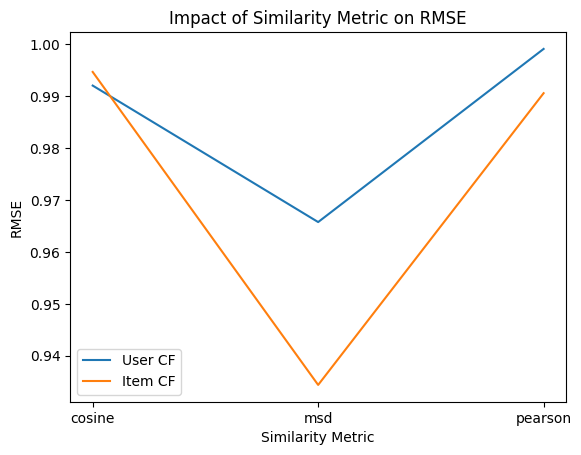

In [54]:
plt.plot(metrics, u_rmses, label='User CF')
plt.plot(metrics, i_rmses, label='Item CF')
plt.title('Impact of Similarity Metric on RMSE')
plt.xlabel('Similarity Metric')
plt.ylabel('RMSE')
plt.legend()
plt.show()

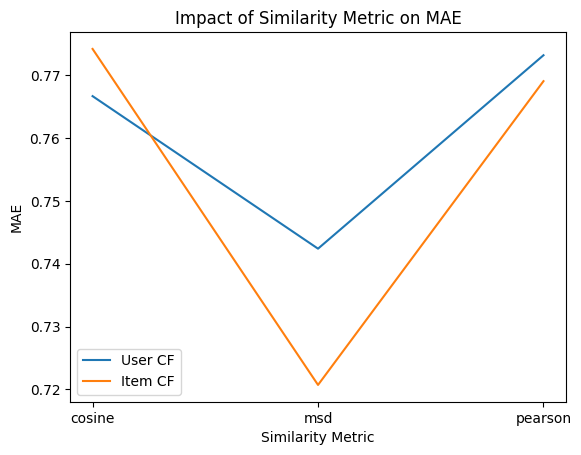

In [55]:
plt.plot(metrics, u_maes, label='User CF')
plt.plot(metrics, i_maes, label='Item CF')
plt.title('Impact of Similarity Metric on MAE')
plt.xlabel('Similarity Metric')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [56]:
u_rmses = []
u_maes = []
i_rmses = []
i_maes = []

num_k = list(range(1, 30))

for k in num_k:
    print(k)
    u_cf = KNNBasic(k=k, sim_options={'user_based': True})
    u_run = cross_validate(u_cf, data, measures=['RMSE', 'MAE'], cv=5)
    u_rmse = u_run['test_rmse'].mean()
    u_rmses.append(u_rmse)
    u_mae = u_run['test_mae'].mean()
    u_maes.append(u_mae)

    i_cf = KNNBasic(k=k, sim_options={'user_based': False})
    i_run = cross_validate(i_cf, data, measures=['RMSE', 'MAE'], cv=5)
    i_rmse = i_run['test_rmse'].mean()
    i_rmses.append(i_rmse)
    i_mae = i_run['test_mae'].mean()
    i_maes.append(i_mae)

1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

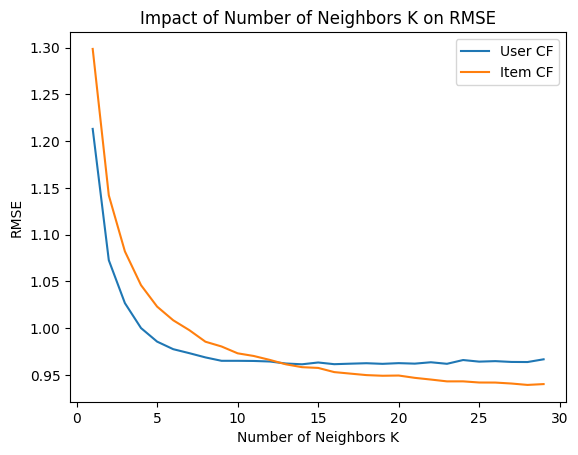

In [57]:
plt.plot(num_k, u_rmses, label='User CF')
plt.plot(num_k, i_rmses, label='Item CF')
plt.title('Impact of Number of Neighbors K on RMSE')
plt.xlabel('Number of Neighbors K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

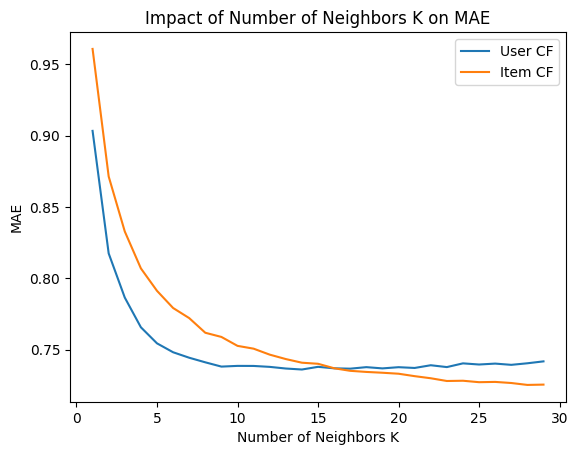

In [58]:
plt.plot(num_k, u_maes, label='User CF')
plt.plot(num_k, i_maes, label='Item CF')
plt.title('Impact of Number of Neighbors K on MAE')
plt.xlabel('Number of Neighbors K')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [59]:
min_rmse_u = min(u_rmses)
min_rmse_i = min(i_rmses)

min_rmse_u_idx = u_rmses.index(min_rmse_u)
min_rmse_i_idx  =i_rmses.index(min_rmse_i)

print(min_rmse_u_idx+1, min_rmse_u)
print(min_rmse_i_idx+1, min_rmse_i)

14 0.9613120867602956
28 0.9392322333299955


In [60]:
min_mae_u = min(u_maes)
min_mae_i = min(i_maes)

min_mae_u_idx = u_maes.index(min_mae_u)
min_mae_i_idx  =i_maes.index(min_mae_i)

print(min_mae_u_idx+1, min_mae_u)
print(min_mae_i_idx+1, min_mae_i)

14 0.7359956740574083
28 0.7251862372019098
